<center><font size = "10"> Week 4 - Cable Theory <center>
<center><font size = "8">Home work<center>

# Ex1: Voltage variation in space

<font size="3">Create a simple morphology with only one section called soma, as it is done in tutorial 01 of this week 4, point 1. Perform a curret clamp experiment in which the stimulation has the following parameters: delay 1 ms, amplitud 1 pA and duration 10 ms. Then do the following:
    
<font size="3">- instead of injecting current at the middle of the section, inject current simultaneously at the two endpoints
        
<font size="3">- without changing the morphology, increase the voltage attenuation from the center of the section to the ends. 
     

<font size="3">Plot the result for each of the previous points and explain what is happening in each situation. In this exercise is important to keep the previous values each time you change some parameter.
If not, you won’t be able to compare them.
    
[0.5 points]

Text(0.5, 1.0, 'Spatial distribution at t = 1.025 ms')

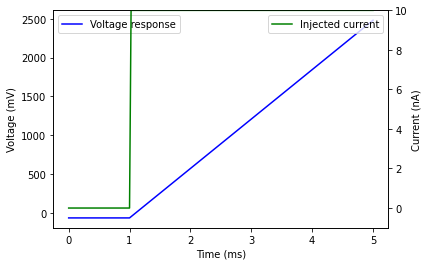

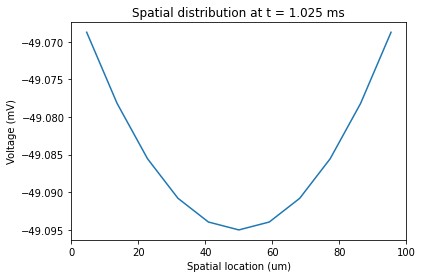

In [1]:
# First call all the usefull packages
from neuron import h
import matplotlib.pyplot as plt

%matplotlib inline

# Create a section 
soma = h.Section()
soma.Ra = 1
soma.L = 100
soma.diam = 10
soma.cm = 1

# Inject a current step into the soma
stim = h.IClamp(soma(1))  # We place the stimulation at the two endpoints
stim.delay = 1 # ms
stim.amp = 10   # pA
stim.dur = 10   # ms

stim2 = h.IClamp(soma(0))  # We place the stimulation at the two endpoints
stim2.delay = 1 # ms
stim2.amp = 10   # pA
stim2.dur = 10  # ms

# Initialize NEURON vectors to record time, voltage and current
rec_t = h.Vector()
rec_t.record(h._ref_t)

rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

rec_i = h.Vector()
rec_i.record(stim._ref_i)

# Initialize and run a simulation
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.continuerun(5)
h.steps_per_ms = 40.0

h.init()
h.run()

# Plot the stimulation protocol and the voltage response
fig, ax1 = plt.subplots()
plt.plot(rec_t,rec_v, 'b', label = "Voltage response")
ax2 = ax1.twinx()
plt.plot(rec_t,rec_i, 'g', label = "Injected current")

ax2.set_ylim([-1,10])
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Voltage (mV)")
ax2.set_ylabel("Current (nA)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

soma.nseg = 11

def transposeRecording(reclist, nloc, tstop):
    retlist = []  
    # each element of reclist is a neuron.h.Vector of recordings for one out of nloc spatial locations
    # (usually compartment centers) over time
    for i in range(0,int(tstop/h.dt)+1): # i is the time point
        retlist.append(h.Vector(nloc,0)) # save the vector
        for j in range(0,nloc): # j the location of the recording
            retlist[i].x[j] = reclist[j].x[i]
    return retlist

reclist = h.List()

# for each soma segment (there are 22)
for i in range(0,soma.nseg):
    tmpRecVec = h.Vector() # vector to record
    tmpRecVec.record(soma((0.5 + i*1.0)/soma.nseg)._ref_v) # take the middle of each segment
    reclist.append(tmpRecVec) # rec list --> saves the vectors for each segment

# run the simulation
h.init()
h.run(11)
xlocations = h.Vector()

# for each of this segment, we save the location in the soma
for i in range(0,soma.nseg):
    xlocations.append(soma.L*(0.5 + i*1.0)/(soma.nseg))

# transpose the recordings
spatialrec = transposeRecording(reclist, soma.nseg, 5)
fig = plt.figure()
plt.plot(xlocations, spatialrec[41]) # 1.025/0.025 = 41
plt.ylabel("Voltage (mV)")
plt.xlabel("Spatial location (um)")
plt.title("Spatial distribution at t = 1.025 ms")


Text(0.5, 1.0, 'Spatial distribution at t = 1.025 ms')

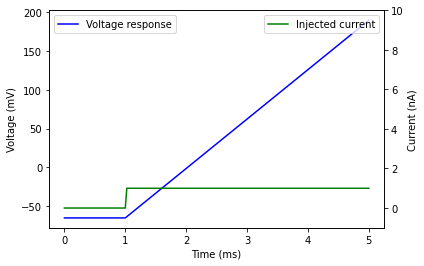

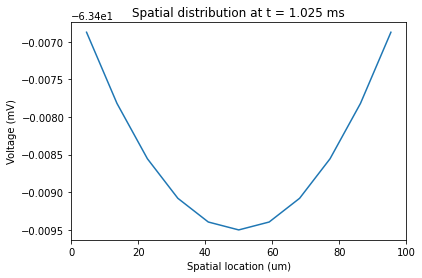

In [2]:
# First call all the usefull packages
from neuron import h
import matplotlib.pyplot as plt

%matplotlib inline

# Create a section 
soma = h.Section()
soma.Ra = 1
soma.L = 100
soma.diam = 10
soma.cm = 1

# Inject a current step into the soma
stim = h.IClamp(soma(1))  # We place the stimulation at the two endpoints
stim.delay = 1 # ms
stim.amp = 1   # pA
stim.dur = 10   # ms

stim2 = h.IClamp(soma(0))  # We place the stimulation at the two endpoints
stim2.delay = 1 # ms
stim2.amp = 1   # pA
stim2.dur = 10   # ms

# Initialize NEURON vectors to record time, voltage and current
rec_t = h.Vector()
rec_t.record(h._ref_t)

rec_v = h.Vector()
rec_v.record(soma(0.5)._ref_v)

rec_i = h.Vector()
rec_i.record(stim._ref_i)

# Initialize and run a simulation
h.load_file('stdrun.hoc')
h.finitialize(-65)
h.continuerun(5)
h.steps_per_ms = 40.0

h.init()
h.run()

# Plot the stimulation protocol and the voltage response
fig, ax1 = plt.subplots()
plt.plot(rec_t,rec_v, 'b', label = "Voltage response")
ax2 = ax1.twinx()
plt.plot(rec_t,rec_i, 'g', label = "Injected current")

ax2.set_ylim([-1,10])
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("Voltage (mV)")
ax2.set_ylabel("Current (nA)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


soma.nseg = 11

reclist = h.List()

# for each soma segment (there are 22)
for i in range(0,soma.nseg):
    tmpRecVec = h.Vector() # vector to record
    tmpRecVec.record(soma((0.5 + i*1.0)/soma.nseg)._ref_v) # take the middle of each segment
    reclist.append(tmpRecVec) # rec list --> saves the vectors for each segment

# run the simulation
h.init()
h.run(11)
xlocations = h.Vector()

# for each of this segment, we save the location in the soma
for i in range(0,soma.nseg):
    xlocations.append(soma.L*(0.5 + i*1.0)/(soma.nseg))

# transpose the recordings
spatialrec = transposeRecording(reclist, soma.nseg, 5)
fig = plt.figure()
plt.plot(xlocations, spatialrec[41]) # 1.025/0.025 = 41
plt.ylabel("Voltage (mV)")
plt.xlabel("Spatial location (um)")
plt.title("Spatial distribution at t = 1.025 ms")

It can be seen that short after the current injection, there is a big change in the voltage at the end points of the soma, where the stimulus has been applied. This voltage propagates to the center of the soma, and it encounters the axial resistivity. This in turn causes a continuous voltage drop, that will decrease the driving force with distance away from the two injection points. If we decrease the current injected without changing the morphology, we can see that there is a smaller change of voltage from the end points to the center of the soma (in accordance with Ohm's Law).

# Ex 2. Action Potential Propagation. 

<font size='3'>Create a neuron with a soma, an axon with three sections, and a dendrite with three branches, each of the branches with different diameters but with the same length. Add passive properties to every section and add active properties (hh) to the soma, axon and the dendrite, but not to the branches. You can use the parameters from tutorial 03. Perform a current clamp experiment in which the axon is stimulated at the end closest to the soma and the branches are recorded at the far end. Choose the best stimulation parameters to see the signal attenuation in the branches.
    
<font size='3'>Explain with your own words:
    
<font size='3'>- What are passive and active membrane properties?
    
<font size='3'>- What is going on with the signal propagation from the soma to the branches?
    
<font size='3'>- What happen if the active properties of the dendrite are removed?
    
<font size='3'>- Record the potential at the end of the axon. What happens if the active properties of the middle axonal section are removed? What could this represent biologically?
    
[1.5 points]

In [3]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

# Defining some usefull functions.

# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

# Convenience functions for setting up stimulation, recording and simulation
def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay = 100, amplitude = 0.1, duration = 500):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst = [], idictlst = [], vmax = 40, vmin=-71, imax = 0.5):
    plt.figure()
    plt.title('currents')
    plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (pA)')
    for idict in idictlst:
        plt.plot(t,idict['vec'],label=idict['loc'])
    plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
    plt.ylim((vmin,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label=vdict['loc'])
    plt.legend(loc=1)

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })
    
# Plot morphology
def plot_morpho(fname = 'cell_01'):
    fname = '{}.swc'.format(fname)
    h.define_shape()
    h.topology()
    neuron2swc(fname, swap_yz=False)
    neuron1 = nm.load_neuron(fname)
    viewer.draw(neuron1)

##### a) Experiment with active and passive properties


|-|       soma(0-1)
   `|       dend(0-1)
     `|       branch_1(0-1)
     `|       branch_2(0-1)
     `|       branch_3(0-1)
 `--|       axon(0-1)

Wrote cell 0 to our_cell.swc


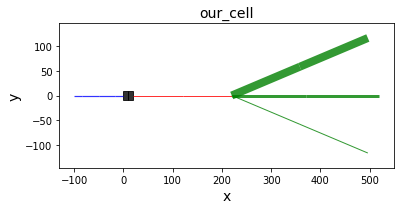

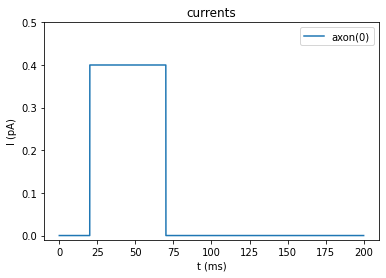

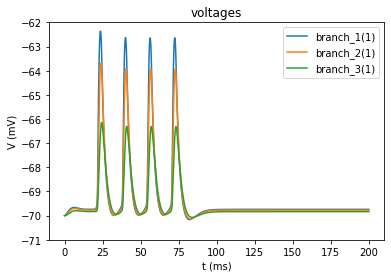

In [4]:
# Define all the sections first
soma = h.Section(name='soma')
dend = h.Section(name='dend')
axon = h.Section(name='axon')

# Soma section (black in plot)
soma.L = 20       # length (µm)
soma.diam = 20    # diameter (µm)
soma.Ra = 123.0   # axial resistivity (Ω*cm)
soma.cm = 1       # capacitance (µF/cm^2) 

# Dendrite section (red in plot)
dend.L = 200       # length (µm)
dend.diam = 1     # diameter (µm)
dend.nseg = 1     # number of segments
dend.Ra = 123.0   # axial resistivity (Ω*cm)
dend.cm = 1       # capacitance (µF/cm^2) 

# Axon section (blue in plot)
axon.diam = 3
axon.L = 100      # length (µm)
axon.nseg = 3     # diameter (µm)
axon.Ra = 123.0   # axial resistivity (Ω*cm)
axon.cm = 1       # capacitance (µF/cm^2) 

# Topology
dend.connect(soma(1))
axon.connect(soma(0))

# Passive and active properties 
soma.insert('pas')
for seg in soma:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
soma.insert('hh')
for seg in soma:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
dend.insert('pas')
for seg in dend:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
dend.insert('hh')
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
axon.insert('pas')
for seg in axon:
    seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
    seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential
    
axon.insert('hh')
for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
    
branch_1 = h.Section(name='branch_1')
branch_2 = h.Section(name='branch_2')
branch_3 = h.Section(name='branch_3')

branchlst = [branch_1,branch_2,branch_3]

# Branch geometry
# Long and thick

# Short and thin
branch_1.L = 300
branch_1.diam = 8
# Short and thick
branch_2.L = 300
branch_2.diam = 3
# Long and thin
branch_3.L = 300
branch_3.diam = 1

# Connect them
branch_1.connect(dend(1))
branch_2.connect(dend(1))
branch_3.connect(dend(1))

# Passive properties in dendrite branches
for branch in branchlst:
    branch.Ra = 130.0   # axial resistivity (Ω*cm)
    branch.cm = 1       # capacitance (µF/cm^2) 
    branch.insert('pas')
    for seg in branch:
        seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
        seg.pas.e = -70    # Leak reversal potential, it influences the steady state membrane potential


# Plot morphology so far
plot_morpho('our_cell')

reset()

# Setup stimulations and recordings
iclamp(axon(0), delay = 20, amplitude = 0.4, duration = 50)
vrecord(branch_1(1))
vrecord(branch_2(1))
vrecord(branch_3(1))


# Simulate and plot
v_init = -70
t_stop = 200

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, vmax=-62)

##### b) Remove active properties of dendrites

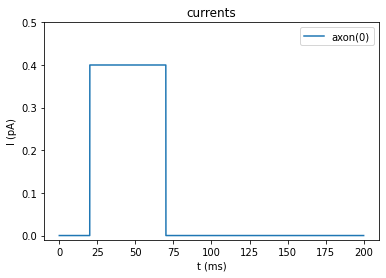

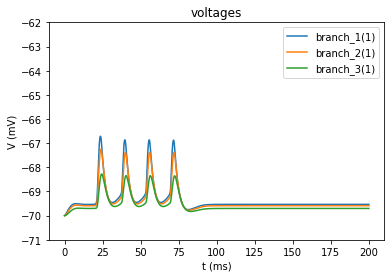

In [5]:
for seg in dend:
    seg.hh.gkbar = 0   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0  # Maximal conductance of the sodium channels

reset()

# Setup stimulations and recordings
iclamp(axon(0), delay = 20, amplitude = 0.4, duration = 50)
vrecord(branch_1(1))
vrecord(branch_2(1))
vrecord(branch_3(1))


# Simulate and plot
v_init = -70
t_stop = 200

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, vmax=-62)

##### c) record at the end of the axon

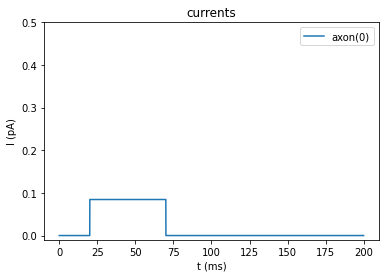

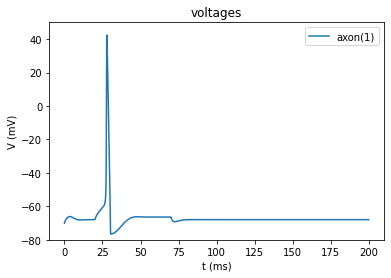

In [6]:
# set again dendrite properties
for seg in dend:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

for seg in axon:
    seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
    seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
    
reset()

# Setup stimulations and recordings
iclamp(axon(0), delay = 20, amplitude = 0.0845, duration = 50)
vrecord(axon(1))

# Simulate and plot
v_init = -70
t_stop = 200

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, vmax=50, vmin=-80)

##### d) Remove middle axonal active properties

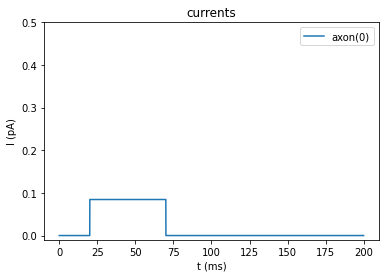

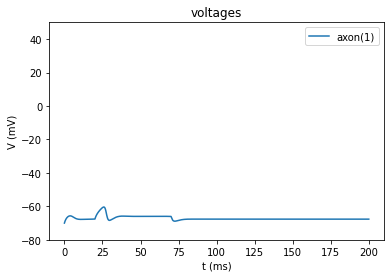

In [7]:
# remove middle axon prop
axon(0.5).hh.gkbar = 0   # Maximal conductance of the potassium channels
axon(0.5).hh.gnabar = 0  # Maximal conductance of the sodium channels

reset()

# Setup stimulations and recordings
iclamp(axon(0), delay = 20, amplitude = 0.0845, duration = 50)
vrecord(axon(1))

# Simulate and plot
v_init = -70
t_stop = 200

tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, vmax=50, vmin=-80)

- *What are passive and active membrane properties?*

The passive membrane properties refer to the passive capacitative and resistive aspects inherent to the membrane. The membrane posses an inherent permeability (leaky aspects of the membrane) with passive ion channels, that allow the flow of ions through the membrane depending on the difference between the intracellular and extracellular concentration of a type of ion.

The active properties refer to the ions of the membrane that actively open and close, such as voltage-gated and ligand-gated ion channels. An example of active properties is the generation of action potentials through the activation of voltage-gated ion channels. Another example, is the generation of excitatory/inhibitory synaptic potentials through the binding of a neurotransmitter, that in turn can gate different ionic conductances.
    
- *What is going on with the signal propagation from the soma to the branches?*

The stimulus is applied close to the soma, leading to a change of potential of the membrane in this area. This change of voltage propagates to the branches. As explained by the cable equation, there is a decay of the change of voltage when the signal propagates, in this case from the soma to the branches. This propagation properties depend as well on the morphology of the neurites. We can see that depending on the diameter of the branch, the propagation of the signal will be different. More specifically, the membrane resistance is inversely proportional to the diameter/radius. Thus the bigger the branch diameter, the smaller the membrane resistance will be, and the less resistance the potential will encounter, the smaller the drop in voltage will be.
    
- *What happen if the active properties of the dendrite are removed?*

If the active properties of the dendrites are removed, there will not be a drop in the voltage recorded at the dendritic branches. More specifically, the voltage will encounter the normal resisitivity of the cell but will lack additional charges coming from active voltage-gated conductances, that normally aid the propagation.
    
- *Record the potential at the end of the axon. What happens if the active properties of the middle axonal section are removed? What could this represent biologically?*

An action potential is generated in the initial segment of the axon. Normally, this potential can propagate even towards the end of the axonal compartment, due to the existence of active membrane properties, that regenerate the potential along the way. When these properties are removed (in the middle axonal part), the potential will attenuate, thus not reaching the end point of the segment. The attenuated potential will not be high enough to elicit an action potential at the end of the axon.

# Ex 3. Dendritic input signal sumation in the soma

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment that stimulates all the dendrites (basal and apical) in the middle. Play arround with the different stimulation parameters: delay, amplitude and duration.

<font size="3">Plot some results that would help you to explain: what is dendritic signal integration? and in your opinion, what is the importance of this in biology?
    
<font size="3">What happens when you stimulate only the basal or only the apical dendrites? Why is this?
    
[3 points]

In [3]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

h.load_file('stdrun.hoc')

1.0

In [7]:
# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

# Convenience functions for setting up stimulation, recording and simulation

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay = 100, amplitude = 0.1, duration = 500):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst = [], idictlst = [], vmax = 40, imax = 0.5, xmax = 200):
    plt.figure()
    plt.title('currents')
    #plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (pA)')
    for idict in idictlst:
        plt.plot(t,idict['vec'],label=idict['loc'])
    #plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
    #plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    plt.xlim(50, xmax)
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label=vdict['loc'])
    plt.legend(loc=1)

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })

In [8]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # If we have a .swc morphology file
        cell = h.Import3d_Neurolucida3() # If we have an .asc morphology file

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('Group8_morphology.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.dendritic.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            if 'axon' in sec.name():
                self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """   
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert('pas')
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70
        
        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.dendritic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.apical:
            # insert hh
            sec.insert('hh')
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.axonal:
            # insert hh
            sec.insert('hh')
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

In [9]:
Cell = NEURON()


14961 lines read


##### a) Stimulation of all dendrites with delay

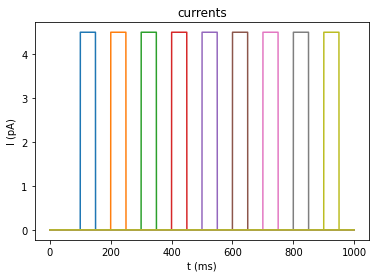

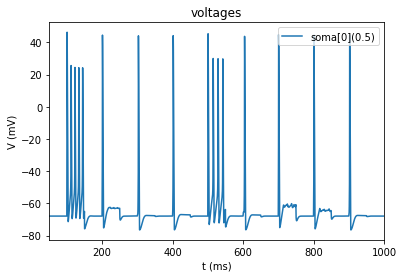

In [10]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = 4.5, delay = 100 + idx * 100, duration = 50)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 1000)

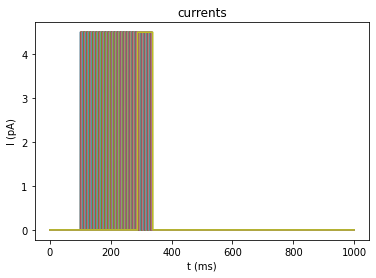

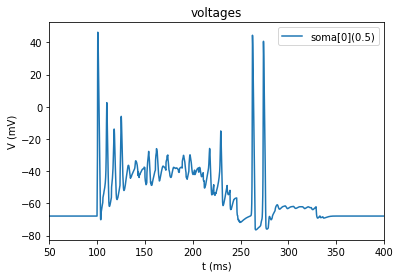

In [11]:
reset()

dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = 4.5, delay = 100 + idx * 1, duration = 50)
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 400)

##### b) Stimulation of 1 dendrite vs stimulation of all dendrites

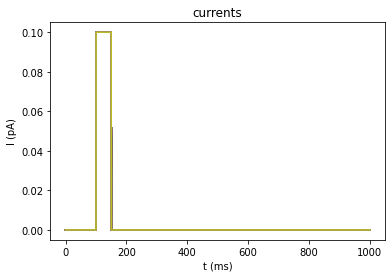

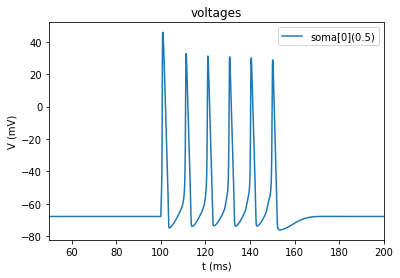

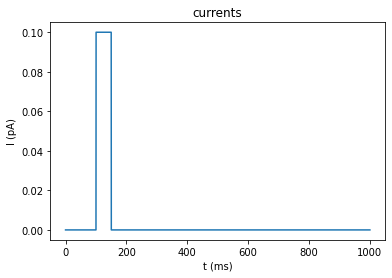

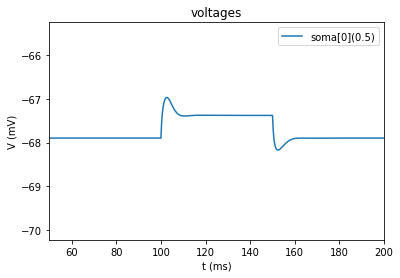

In [12]:
reset()
# Inject a current step into the dendrites
dendrite_list = Cell.dendritic + Cell.apical

# Setup stimulations and recordings
for idx,dendrites in enumerate(dendrite_list):
    iclamp(dendrites(0.5), amplitude = 0.1, delay = 100, duration = 50)
vrecord(Cell.somatic[0](0.5))      

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

reset()

# Setup stimulations and recordings
iclamp(dendrite_list[1](0.5), amplitude = 0.1, delay = 100, duration = 50)
vrecord(Cell.somatic[0](0.5))   

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

##### c) Stimulate only apical dendrites

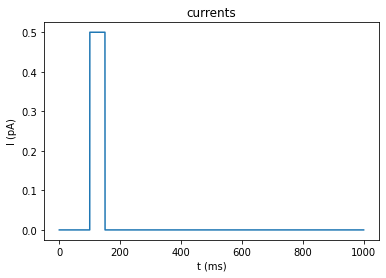

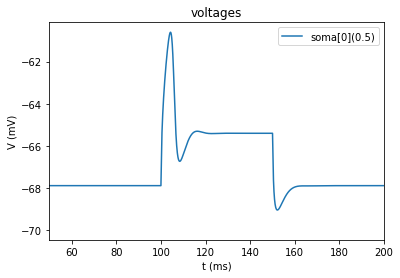

In [13]:
reset()
# Inject a current step into the dendrites
 
for idx, dend in enumerate(Cell.dendritic):
    
    if idx==0:
        
        iclamp(Cell.apical[idx](0.5), amplitude = 0.5, delay = 100, duration = 50)          


# record in the soma
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax =200)

##### d) Stimulate only basal dendrites

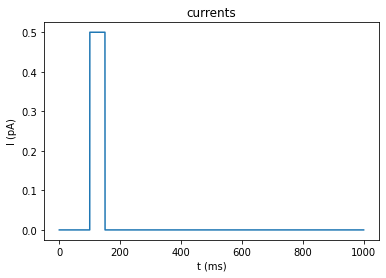

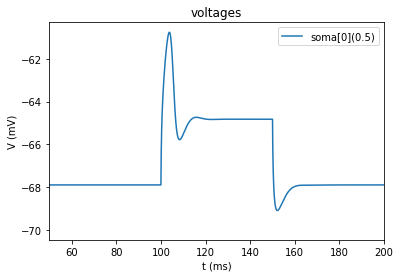

In [14]:
reset()
# Inject a current step into the dendrites
 
for idx, dend in enumerate(Cell.dendritic):
    
    if idx==0:
            
        iclamp(dend(0.5), amplitude = 0.5, delay = 100, duration = 50)  


# record in the soma
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

##### e) Stimulate an apical and a basal dendrite

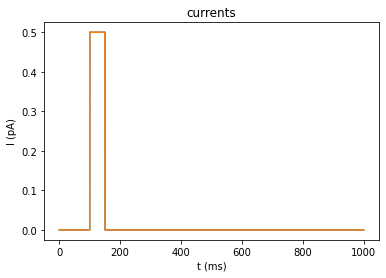

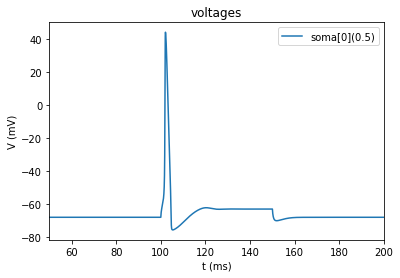

In [15]:
reset()
# Inject a current step into the dendrites
 
for idx, dend in enumerate(Cell.dendritic):
    
    if idx==0:
            
        iclamp(dend(0.5), amplitude = 0.5, delay = 100, duration = 50)  
        iclamp(Cell.apical[idx](0.5), amplitude = 0.5, delay = 100, duration = 50)          



# record in the soma
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

##### f) Stimulate all apical dendrites

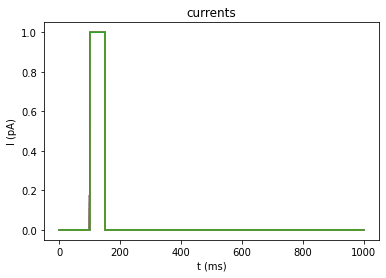

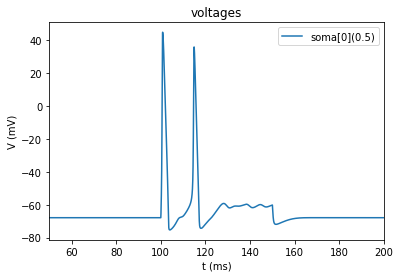

In [16]:
reset()
# Inject a current step into the dendrites
 
for apic in Cell.apical:
    iclamp(apic(0.5), amplitude = 1, delay = 100, duration = 50)          

# record in the soma
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

##### g) Stimulate all basal dendrites

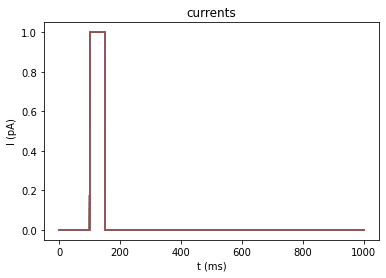

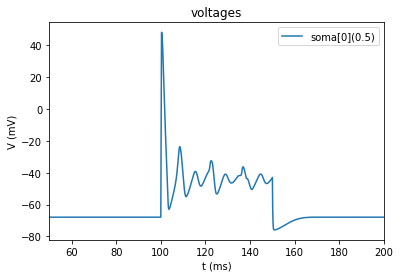

In [17]:
reset()
# Inject a current step into the dendrites
 
for dend in Cell.dendritic:
    iclamp(dend(0.5), amplitude = 1, delay = 100, duration = 50)          

# record in the soma
vrecord(Cell.somatic[0](0.5))

# Simulate and plot
v_init = -70
t_stop = 1000
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst)

- *Plot some results that would help you to explain: what is dendritic signal integration? and in your opinion, what is the importance of this in biology?*

Cells fire only when synaptic excitation sufficiently exceeds inhibition. The simplest view of synaptic integration is that excitatory inputs sum (dendritic signal integration) as we can see in figure b), and if the resulting depolarization is large enough to reach threshold, an action potential is generated. In this model, inhibition opposes this depolarization, thus increasing the number of active excitatory inputs require to reach threshold.

Post synaptic potentials (both inhibitory and excitatory) spread from their generation site to the action potential initiation zone to influence AP initiation. Propagation of synaptic potentials is affected by the passive cable properties of dendrites as well as the voltage-gated conductances. Even with passive dendrites, excitatory and inhibitory potentials can sum non-linearly, in a manner determined by the spatial and temporal relationship between them. The process of synaptic integration is complicated by ongoing AP firing, which can shunt synaptic potentials and change availability of voltage-gated conductances. 

As we have mentioned above, excitatory potentials sum in a manner dependent on their spatial and temporal relationships. This property is better exemplified in panel a). For example, we first inject current in all  dendrites with a delay between consecutive stimulation. We can observe that sometimes, the stimulation leads to burst firing, other times this it leads to action potential initiation. Sometimes this AP initiation is followed by an additional sub-threshold excitatory potential that never leads to a second spike. This difference in firing behaviour could be explained by the geometry of the cell. For example, when a dendrite is situated closer to the soma, the resultant potential will have to propagate over a short distance, and thus will be less attenuated. That means that a higher  excitatory potential will reach the soma,and this potential will cross the threshold for AP initiation for lonegr times. This in turn will lead to the burst firing behaviour. Another factor affecting the propagation through dendrites, is the diameter of a given dendrite(i.e. the bigger the dendrite, the less axial resisitivity will the potential encounter, thus the less attenuated it will be with distance).

We then stimulate the dendrites at very short delays (1s compared to 100ms before). We can observe that initially, after the first dendrite is injected, we have an increase in potential that could resemble the rising phase of an action potential. But as the stimulation are too close in time, the somatic compartment never has time to recover (go through the hyperpolarization phase). Thus, the cell never has time to surpass the refractory period (the period during which another action potential cannot be initiated), as the next input is already ariving from the next stimulated dendrite.

- *What happens when you stimulate only the basal or only the apical dendrites? Why is this?*

In Panel c) and d) we can observe the electrical behaviour of the somata, when only one basal or one apical dendrite is injected. As we can observe, in both cases the resultant potential are too small, such that these never cross the threshold needed for action potential generation. If we now stimulated both the apical and basal dendrites, the two EPSPs will summate in the soma. The resultant EPSP will be high enough to reach threshold, and thus generate an action potential. Again this behaviour will be highly dependent on the spatial relationship of the dendrites as well as their geometry. Stimulating two other dendrites at the same time may lead to different behaviour. Moreover, some dendrites could elicit an AP if they have a delay in their stimulation.

In Panel f) and g) we are now stimulating all the basal, and respectively all apical dendrites. As we can observe stimulating all apical dendrites, leads to an initial action potential, that is followed by a second spike. On contrary, stimulating the basal dendrites leads to an initial inflection, but the voltage never reaches the normal resting membrane potential. As a consequence, the compartment never overcomes the refractory period, during which a second action potential cannot be initiated. This might seem like a strinking difference, as one might expect that the more distal apical dendrites, will lead to more attenuated potential arriving at the soma. However, as we are stimulating a high amount of basal dendrites (92),one can imagine that their proximity to the somata could prove to be a disadvantage in this scenario. Their respective potential will have to travel shorter distance, and thus will likely arive faster in the soma. Due to the high number of incoming basal inputs, this could lead to the simultaneous arrival of many EPSPs. This is similar to the scenario we have discribed for Panel
a).


- *What is the importance of this in biology?*
 
As neuroscientist try to understand how neural circuits control behaviour, we have not only to understand the multitude of cell types and vast connections between them , but also how these integrate their inputs to generate their output and give rise to specific behaviours. Dendrites are the main players in this process, as they receive large number of inputs and perform complex computations. Thus, to understand behavioural principles and cell type-specific computations, the study of dendritic integration across cell types will prove to be a vital step. 


# Ex 4. Signal attenuation: dendrites vs axon

<font size="3">Load the morphology file for your group, and instanciate it as it is done on tutorial 03. Perform a current clamp experiment in which the soma is stimulated in the middle (find the stimulation parameters that support your explanation better). Record the back propagating signals of the dendrites and the forward signal in the axon.

<font size="3">What would you expect in terms of attenuation? Would you expect the signal to be more attenuated in the axon or in the dendrites? Why? Change the properties of some of the sections, such that you get a different result. Explain why this works
    
[1.75 points]

In [18]:
%matplotlib inline

from neuron import h
import matplotlib.pyplot as plt
import numpy as np
import math as m
import neurom as nm
from neurom import viewer
from hoc2swc import neuron2swc

In [19]:
# Global containers for objects
stimdictlst = [] # stimulations
vdictlst = []    # voltage recordings
idictlst = []    # current recordings

# Convenience functions for setting up stimulation, recording and simulation

def reset():
    del stimdictlst[:]
    del vdictlst[:]
    del idictlst[:]

# Inject a current step with parameters at location
def iclamp(location, delay = 100, amplitude = 0.1, duration = 500):
    stim = h.IClamp(location) # Place a stimulation electrode at location
    stim.delay = delay   # stim delay (ms)
    stim.amp = amplitude # stim amplitude (pA)
    stim.dur = duration  # stim duration (ms)
    stimdictlst.append({ 'stim': stim, 'loc': str(location) })

# Initialize and run a simulation
def initrun(v_i,t_stop):
    # Record time
    rec_t = h.Vector()
    rec_t.record(h._ref_t)
    # Record current for all stimuli
    for stimdict in stimdictlst:
        irecord(stimdict)
    # Setup simulation and run
    h.load_file('stdrun.hoc')
    h.finitialize(v_i) # initial voltage
    h.continuerun(t_stop) # final time
    return rec_t

# Plot current and voltage for all stims and recordings
def tvi_plots(t, vdictlst = [], idictlst = [], vmax = 40, imax = 0.5, xmax = 100):
    plt.figure()
    plt.title('currents')
    #plt.ylim((-0.01,imax))
    plt.xlabel('t (ms)')
    plt.ylabel('I (pA)')
    for idict in idictlst:
        plt.plot(t,idict['vec'],label=idict['loc'])
    #plt.legend(loc=1)
    
    plt.figure()
    plt.title('voltages')
    #plt.ylim((-71,vmax))
    plt.ylabel('V (mV)')
    plt.xlabel('t (ms)')
    plt.xlim(50, xmax)
    for vdict in vdictlst:
        plt.plot(t,vdict['vec'],label=vdict['loc'])
    plt.legend(loc=1)

# Setup recording of voltage at location
def vrecord(location):
    vec = h.Vector()
    vec.record(location._ref_v) # record voltage at location
    vdictlst.append({ 'vec': vec, 'loc': str(location) })

# Setup recording of stimulation current
def irecord(stimdict):
    vec = h.Vector()
    vec.record(stimdict['stim']._ref_i) # record stimulation current
    idictlst.append({ 'vec': vec, 'loc': stimdict['loc'] })

In [20]:
class NEURON:
    def __init__(self):
        self.build_morphology()
        self.define_biophysics()
        
    def build_morphology(self):
        """
        Loads a 3D morphology of the neuron
        """
        # Load hoc routines to import 3D morphologies
        h.load_file('stdlib.hoc')
        h.load_file("import3d.hoc")
        #cell = h.Import3d_SWC_read() # If we have a .swc morphology file
        cell = h.Import3d_Neurolucida3() # If we have an .asc morphology file

        # Read the file and creates automatically section.connect(parent) statements
        cell.input('Group8_morphology.asc')

        # Instantiate morphology for simulation and
        # execute the connect statements and loads the cell into h scope
        self.importedcell = h.Import3d_GUI(cell,0)
        self.importedcell.instantiate(None) 

        # Create python lists from the morphology with the different sections: soma, dend, apic and axon
        self.somatic = []
        self.dendritic = []
        self.apical = []
        self.axonal = []
        self.all = []
        for sec in h.allsec():
            if 'soma' in sec.name():
                self.somatic.append(sec)
            if 'dend' in sec.name():
                self.dendritic.append(sec)
            if 'apic' in sec.name():
                self.apical.append(sec)
            if 'axon' in sec.name():
                self.axonal.append(sec)
    
    def define_biophysics(self):
        """
        Distributes passive mechanisms and hh active prop on the soma and dendrites
        """   
        # Define passive properties for all sections
        for sec in h.allsec():
            sec.insert('pas')
            sec.nseg = 1
            for seg in sec:
                seg.pas.g = 0.0003 # Conductance of the leak channels (in S/cm2)
                seg.pas.e = -70
        
        # Define active properties for soma, dendrite, apical dendrite and axon
        for sec in self.somatic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 1
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.dendritic:
            # insert hh
            sec.insert('hh')
            sec.Ra = 300
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.apical:
            # insert hh
            sec.insert('hh')
            sec.Ra = 400
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels
        
        for sec in self.axonal:
            # insert hh
            sec.insert('hh')
            sec.Ra = 100
            sec.nseg = 1
            for seg in sec:
                seg.hh.gkbar = 0.1   # Maximal conductance of the potassium channels
                seg.hh.gnabar = 0.4  # Maximal conductance of the sodium channels

##### a) Both axon and dendrites with active properties


14961 lines read


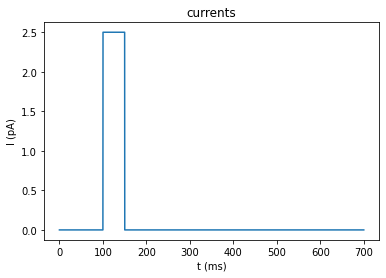

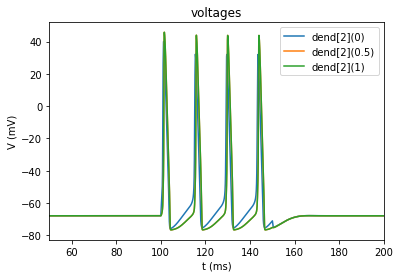

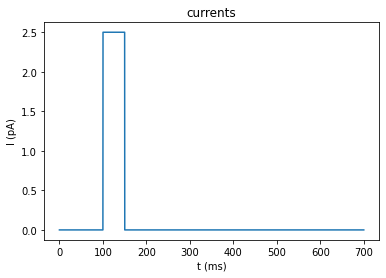

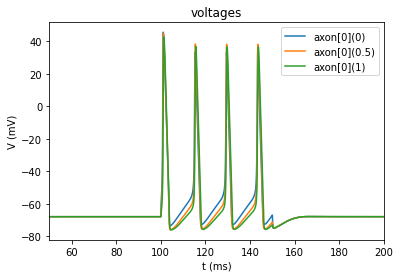

In [21]:
Cell = NEURON()

# Inject a current step into the soma
reset()

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = 2.5, delay = 100, duration = 50)
    
locations = np.linspace(0,1,3)
for p in locations:
    vrecord(Cell.dendritic[2](p))
    
# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 200)

# Inject a current step into the soma
reset()

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = 2.5, delay = 100, duration = 50)
    
locations = np.linspace(0,1,3)
for p in locations:
    vrecord(Cell.axonal[0](p))
    
# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 200)

##### b) Axons and dendrites without active properties


14961 lines read


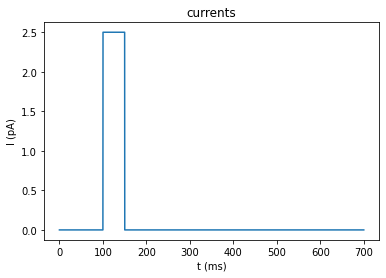

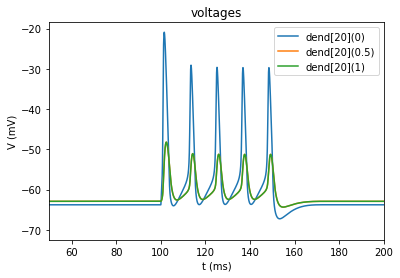

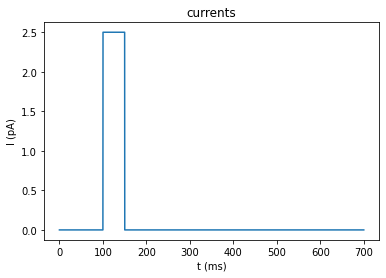

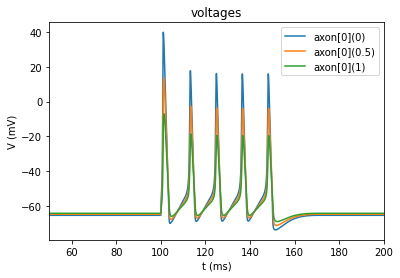

In [23]:
Cell = NEURON()

for sec in Cell.axonal:
    # insert hh
    for seg in sec:
        seg.hh.gkbar = 0   # Maximal conductance of the potassium channels
        seg.hh.gnabar = 0  # Maximal conductance of the sodium channels
        
for sec in Cell.dendritic:
    # insert hh
    for seg in sec:
        seg.hh.gkbar = 0   # Maximal conductance of the potassium channels
        seg.hh.gnabar = 0  # Maximal conductance of the sodium channels

# Inject a current step into the soma
reset()

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = 2.5, delay = 100, duration = 50)
    
locations = np.linspace(0,1,3)
for p in locations:
    vrecord(Cell.dendritic[20](p))
    
# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 200)

# Inject a current step into the soma
reset()

# Place a stimulation electrode in the middle of the soma
iclamp(Cell.somatic[0](0.5), amplitude = 2.5, delay = 100, duration = 50)
    
locations = np.linspace(0,1,3)
for p in locations:
    vrecord(Cell.axonal[0](p))
    
# Simulate and plot
v_init = -70
t_stop = 700
tvi_plots(initrun(v_init,t_stop),vdictlst,idictlst, xmax = 200)

We can observe that when both dendrites and axons have active properties, the injected current is enough to elicit both an axonal and a dendritic spike. In this scenario, the elicited signals have similar behaviours. If we now remove the active properties of these compartments, we can observe that for both of them we will see a significant voltage attenuation as the potential propagates along the length of the compartment. Moreover, we can observe that this attenuation is more prominent along the dendritic compartment. This could be explained by smaller diameter of this compartment, as voltage will encounter more resistance traveling through this compartment (in comparison to a larger diameter of the axon).
